In [1]:
import numpy
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam

In [2]:
from keras.datasets.cifar10 import load_data
(trainX, trainy), (testX, testy) = load_data()


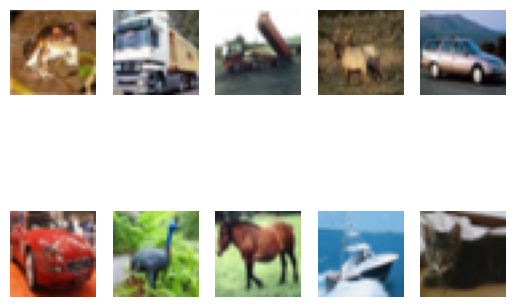

In [3]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(2, 5, 1 + i)
    plt.axis('off')
    plt.imshow(trainX[i])

plt.show()



In [4]:
trainX.shape

(50000, 32, 32, 3)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

def define_discriminator(in_shape=(32, 32, 3)):
    model = Sequential()

    model.add(Conv2D(64, (3, 3),  padding='same', input_shape=in_shape))  # 16x16x64
    model.add(LeakyReLU(alpha=0.2))

    # Downsample
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))  # 8x8x128
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))  # 4x4x128
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))  # 2x2x256
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())  # Shape will be (8192,)
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))  # Output shape of 1

    # Compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model


In [6]:
model= define_discriminator()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         

In [7]:
def load_real_samples():
	(trainX, _), (_, _) = load_data()
	# cConvert to float and scale.
	X = trainX.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5  #Generator uses tanh activation so rescale
                            #original images to -1 to 1 to match the output of generator.
	return X

In [8]:
x=load_real_samples()
x.shape

(50000, 32, 32, 3)

In [9]:
x[0]

array([[[-0.5372549 , -0.5137255 , -0.5058824 ],
        [-0.6627451 , -0.6392157 , -0.64705884],
        [-0.60784316, -0.62352943, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215687, -0.01960784, -0.2       ],
        [ 0.16078432, -0.02745098, -0.19215687]],

       [[-0.8745098 , -0.84313726, -0.84313726],
        [-1.        , -1.        , -1.        ],
        [-0.85882354, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980393, -0.5686275 ],
        [-0.06666667, -0.34901962, -0.60784316],
        [-0.04313726, -0.31764707, -0.5529412 ]],

       [[-0.8039216 , -0.8117647 , -0.8352941 ],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.6156863 , -0.7882353 , -0.9372549 ],
        ...,
        [-0.07450981, -0.34117648, -0.60784316],
        [-0.05882353, -0.34117648, -0.60784316],
        [-0.14509805, -0.42745098, -0.67058825]],

       ...,

       [[ 0.6313726 ,  0.33333334, -0.24705882],
        [ 0

In [10]:
from numpy.random import randint
import numpy as np

# pick a batch of random real samples to train the GAN
#In fact, we will train the GAN on a half batch of real images and another
#half batch of fake images.
#For each real image we assign a label 1 and for fake we assign label 0.
def generate_real_samples(dataset, n_samples):
	# choose random images
	ix = randint(0, dataset.shape[0], n_samples)
	# select the random images and assign it to X
	X = dataset[ix]
	# generate class labels and assign to y
	y = np.ones((n_samples, 1)) ##Label=1 indicating they are real
	return X, y

In [11]:
x,y=generate_real_samples(x,54)
print(x.shape)
print(y.shape)

(54, 32, 32, 3)
(54, 1)


In [12]:
# use the generator to generate n fake examples, with class labels
#Supply the generator, latent_dim and number of samples as input.
#Use the above latent point generator to generate latent points.
def generate_fake_samples( n_samples):
  x=np.random.rand(32*32*3*n_samples)
  x=-1+x*2
  x=x.reshape(n_samples,32,32,3)
  y = np.zeros((n_samples, 1))  #Label=0 indicating they are fake
  return x, y

In [13]:
x,y=generate_fake_samples(54)
print(x.shape)
print(y.shape)
print(y)

(54, 32, 32, 3)
(54, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


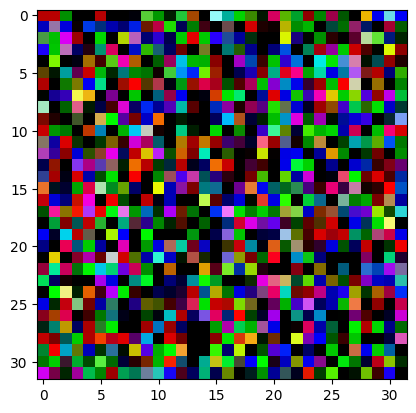

In [14]:
plt.imshow(x[0])

In [15]:
def train_discriminator(model, dataset, n_iter=30, n_batch=128):
  half_batch = int(n_batch / 2)
  for i in range(n_iter):
    x_real, y_real = generate_real_samples(dataset, half_batch)#get randomly selected real samples
    _, real_acc = model.train_on_batch(x_real, y_real)# update descrminator on real samples
    x_fake, y_fake = generate_fake_samples(half_batch)#get randomly selected fake samples
    _, fake_acc = model.train_on_batch(x_fake, y_fake)# update descrminator on fake samples
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [16]:
model=define_discriminator()
dataset=load_real_samples()
train_discriminator(model,dataset)



>1 real=78% fake=2%
>2 real=100% fake=2%
>3 real=100% fake=8%
>4 real=97% fake=48%
>5 real=92% fake=83%
>6 real=94% fake=97%
>7 real=88% fake=100%
>8 real=88% fake=100%
>9 real=88% fake=100%
>10 real=81% fake=100%
>11 real=84% fake=100%
>12 real=94% fake=100%
>13 real=89% fake=100%
>14 real=97% fake=100%
>15 real=97% fake=100%
>16 real=97% fake=100%
>17 real=98% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%
>21 real=100% fake=100%
>22 real=100% fake=100%
>23 real=100% fake=100%
>24 real=100% fake=100%
>25 real=100% fake=100%
>26 real=100% fake=100%
>27 real=100% fake=100%
>28 real=100% fake=100%
>29 real=100% fake=100%
>30 real=100% fake=100%


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Conv2DTranspose, Conv2D

def define_generator(latent_dim):
    model = Sequential()

    # Define the number of nodes for the Dense layer
    n_nodes = 256 * 4 * 4  # 8192 nodes

    # Input layer to reshape the latent vector
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4, 4, 256)))  # 4x4x256 dataset from the latent vector

    # Upsample to 8x8
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Upsample to 16x16
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Upsample to 32x32
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Generate the final image
    model.add(Conv2D(3, (7, 7), activation='tanh', padding='same'))  # 32x32x3

    return model


In [18]:
latent_dim=100
model=define_generator(latent_dim)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 128)         524416    
 anspose)                                                        
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                           

In [19]:
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [20]:
x_input=generate_latent_points(latent_dim,54)
print(x_input.shape)


(54, 100)


In [21]:
# use the generator to generate n fake examples, with class labels
#Supply the generator, latent_dim and number of samples as input.
#Use the above latent point generator to generate latent points.
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict using generator to generate fake samples.
	X = generator.predict(x_input)
	# Class labels will be 0 as these samples are fake.
	y = np.zeros((n_samples, 1))  #Label=0 indicating they are fake
	return X, y

2/2 [==============================] - 0s 77ms/step


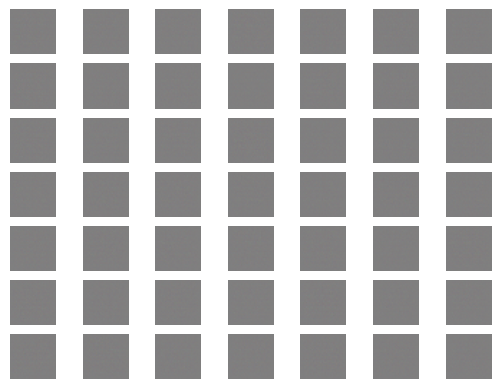

In [22]:
latet_dim=100
model=define_generator(latet_dim)
n_samples=49
x,y=generate_fake_samples(model,latet_dim,n_samples)
x=(x+1)/2.0
for i in range(n_samples):
  plt.subplot(7,7,1+i)
  plt.axis('off')
  plt.imshow(x[i])
plt.show()

In [23]:
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
    d_model.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(g_model)
    # add the discriminator
    model.add(d_model)
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [24]:
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
gan_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         1481475   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 2003972 (7.64 MB)
Trainable params: 1481475 (5.65 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


In [25]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            x_real, y_real = generate_real_samples(dataset, half_batch)
            dloss1, _ = d_model.train_on_batch(x_real, y_real)
            x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            dloss2, _ = d_model.train_on_batch(x_fake, y_fake)

            x_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = np.ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(x_gan, y_gan)

            # Ensure loss values are scalars
            dloss1 = dloss1[0] if isinstance(dloss1, (list, tuple)) else dloss1
            dloss2 = dloss2[0] if isinstance(dloss2, (list, tuple)) else dloss2
            g_loss = g_loss[0] if isinstance(g_loss, (list, tuple)) else g_loss

            print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
                  (i + 1, j + 1, bat_per_epo, dloss1, dloss2, g_loss))

            if (i + 1) % 10 == 0:
                summarize_performance(i, g_model, d_model, dataset, latent_dim)


In [26]:
def summarize_performance(epoch, g_model, d_model, latent_dim, dataset, n_samples=100):
    # Prepare real samples
    x_real, y_real = generate_real_samples(dataset, n_samples)
    # Evaluate discriminator on real examples
    _, acc_real = d_model.evaluate(x_real, y_real, verbose=0)

    # Prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    # Evaluate discriminator on fake examples
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)

    # Summarize discriminator performance
    print(f'> Accuracy real: {acc_real * 100:.0f}%, fake: {acc_fake * 100:.0f}%')

    # Save the generator model
    filename = f'generator_model_{epoch + 1:03d}.h5'
    g_model.save()


In [28]:
train(generator,discriminator,gan_model,dataset,latent_dim,n_epochs=5,n_batch=64)

1/1 [==============================] - 0s 123ms/step
>1, 1/781, d1=0.519, d2=0.423 g=1.367
1/1 [==============================] - 0s 122ms/step
>1, 2/781, d1=0.497, d2=0.532 g=1.307
1/1 [==============================] - 0s 119ms/step
>1, 3/781, d1=0.554, d2=0.543 g=1.380
1/1 [==============================] - 0s 122ms/step
>1, 4/781, d1=0.500, d2=0.422 g=1.283
1/1 [==============================] - 0s 125ms/step
>1, 5/781, d1=0.656, d2=0.437 g=1.283
1/1 [==============================] - 0s 122ms/step
>1, 6/781, d1=0.489, d2=0.537 g=1.197
1/1 [==============================] - 0s 119ms/step
>1, 7/781, d1=0.530, d2=0.650 g=1.185
1/1 [==============================] - 0s 121ms/step
>1, 8/781, d1=0.453, d2=0.547 g=1.190
1/1 [==============================] - 0s 124ms/step
>1, 9/781, d1=0.465, d2=0.583 g=1.140
1/1 [==============================] - 0s 120ms/step
>1, 10/781, d1=0.501, d2=0.558 g=1.266
1/1 [==============================] - 0s 157ms/step
>1, 11/781, d1=0.901, d2=0.516 g=1.2

1/1 [==============================] - 0s 142ms/step


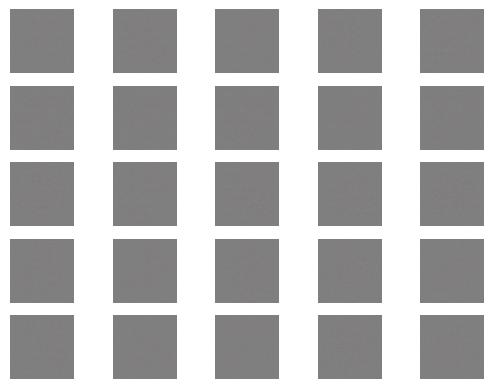

In [35]:
from keras.models import load_model
from numpy.random import randn


# Plot generated images 
def show_plot(examples, n):
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i, :, :, :])
	plt.show()

# load model
# generate images
latent_points = generate_latent_points(100, 25)  #Latent dim and n_samples
# generate images
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

import numpy as np
X = (X*255).astype(np.uint8)

# plot the result
show_plot(X, 5)

#Note: CIFAR10 classes are: airplane, automobile, bird, cat, deer, dog, frog, horse,
# ship, truck
